In [1]:
# treshs = [3e-7, 3e-6, 1e-5, 1e-4]

In [2]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment
from olfactory_navigation.agents.infotaxis_agent import Infotaxis_Agent
from olfactory_navigation.simulation import run_test
from olfactory_navigation.test_setups import run_all_starts_test


from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [3]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

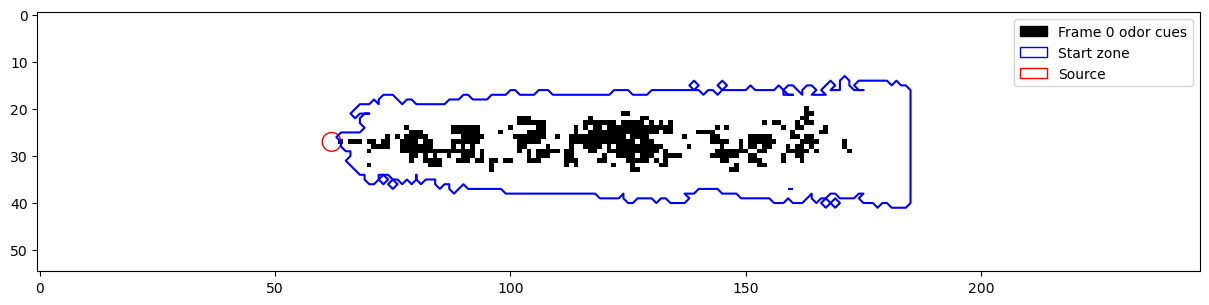

In [4]:
data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
# data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [5]:
ag = Infotaxis_Agent(env)

[05/30/2024, 10:35:49] Instantiation of MDP Model:
[05/30/2024, 10:35:49] - 13585 states
[05/30/2024, 10:35:49] - 4 actions
[05/30/2024, 10:35:49] - At most 1 reachable states per state-action pair
[05/30/2024, 10:35:49] - Starting generation of transitions table
[05/30/2024, 10:35:49]     > [Warning] No transition matrix or function provided but reachable states are, so probability to reach any reachable states will "1 / reachable state count" so here: 1.000.
[05/30/2024, 10:35:49]     > Done in 0.000s
[05/30/2024, 10:35:49] - Generation of state grid
[05/30/2024, 10:35:49] - Generating start probabilities table
[05/30/2024, 10:35:49] - Starting computation of reachable state probabilities from transition data
[05/30/2024, 10:35:49]     > Done in 0.000s

[05/30/2024, 10:35:49] POMDP particular parameters:
[05/30/2024, 10:35:49] - 3 observations
[05/30/2024, 10:35:49] - Starting of transitional observations for reachable states table
[05/30/2024, 10:35:49]     > Done in 0.002s
[05/30/2

In [6]:
hist = run_test(n=10, agent=ag, time_shift=100, horizon=1000, use_gpu=True)

[05/30/2024, 10:35:49] Sending Model to GPU...
[05/30/2024, 10:35:49]     > Done in 0.179s


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 2.964s:
Simulations reached goal: 10/10 (0 failures) (100.00%)
	- Average step count: 82.400 +- 20.06 (Successfull only: 82.400 +- 21.15)
	- Extra steps: 11.600 +- 6.92 (Successful only: 11.600 +- 7.29)
	- Average discounted rewards (ADR): 0.445 +- 0.08 (Successfull only: 0.445 +- 0.09)
	- Tmin/T: 0.863 +- 0.08 (Successful only: 0.863 +- 0.08)


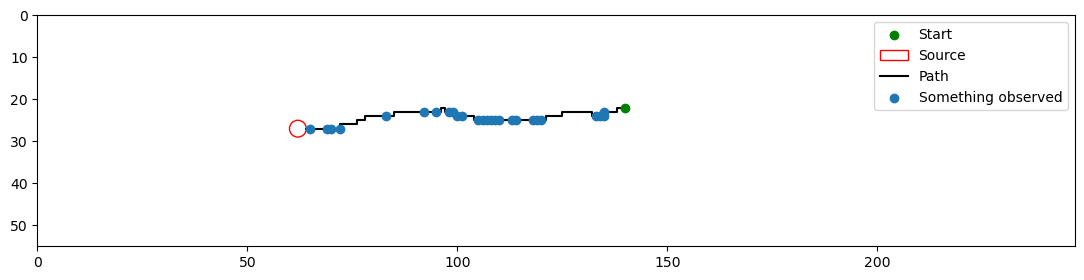

In [7]:
hist.plot(2)

In [8]:
hist = run_all_starts_test(ag, use_gpu=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 26.439s:
Simulations reached goal: 2371/2393 (22 failures) (99.08%)
	- Average step count: 98.259 +- 97.08 (Successfull only: 89.892 +- 43.56)
	- Extra steps: 27.226 +- 92.78 (Successful only: 18.388 +- 13.55)
	- Average discounted rewards (ADR): 0.440 +- 0.19 (Successfull only: 0.444 +- 0.19)
	- Tmin/T: 0.795 +- 0.14 (Successful only: 0.802 +- 0.12)


In [11]:
hist.save()

Simulations saved to: ./Simulations-s_55_247-n_2393-04282024_223619-horizon_1000.csv


In [12]:
np.argwhere(hist.done_at_step == -1)[:,0]

array([ 626,  736,  760, 1217, 1218, 1234, 1334, 1335, 1336, 1452, 1453,
       1454, 1570, 1571, 1572, 1573, 1590, 1689, 1690, 1691, 1807, 1808])

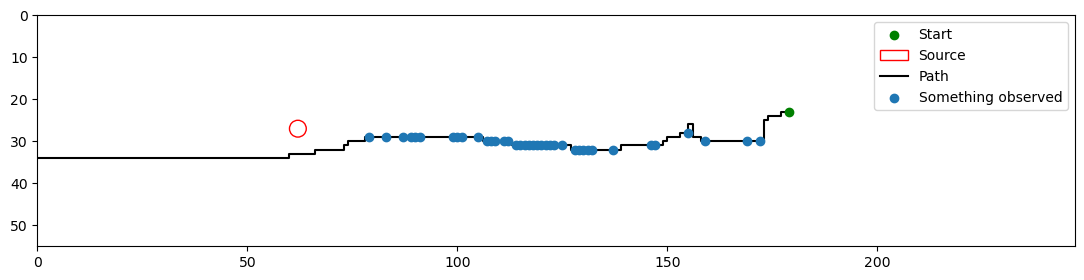

In [13]:
hist.plot(736)

In [25]:
from olfactory_navigation.simulation import SimulationHistory


def plot_failures(history:SimulationHistory):
    failed_sims = np.argwhere(history.done_at_step < 0)[:,0]

    plt.imshow(np.zeros(history.environment.shape), cmap='Greys')

    failed_starts = history.start_state[failed_sims,:]

    plt.scatter(failed_starts[:,1], failed_starts[:,0], c='red')

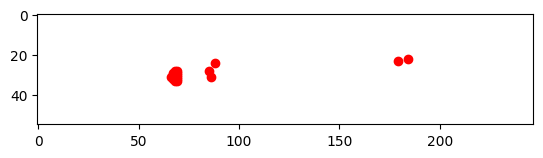

In [26]:
plot_failures(hist)

In [29]:
t = np.zeros(hist.environment.shape)
t[hist.start_state[:,0], hist.start_state[:,1]] = hist.done_at_step

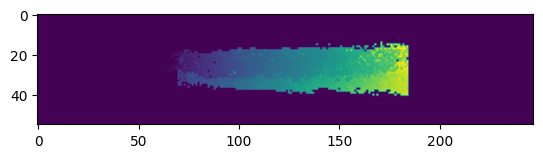

In [30]:
plt.imshow(t)